This code visualizes geographic data by plotting trajectories and a closed road on a map using the GeoPandas and Matplotlib libraries. Trajectories in blue and the closed road as a red line. 

In [13]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import LineString
import json

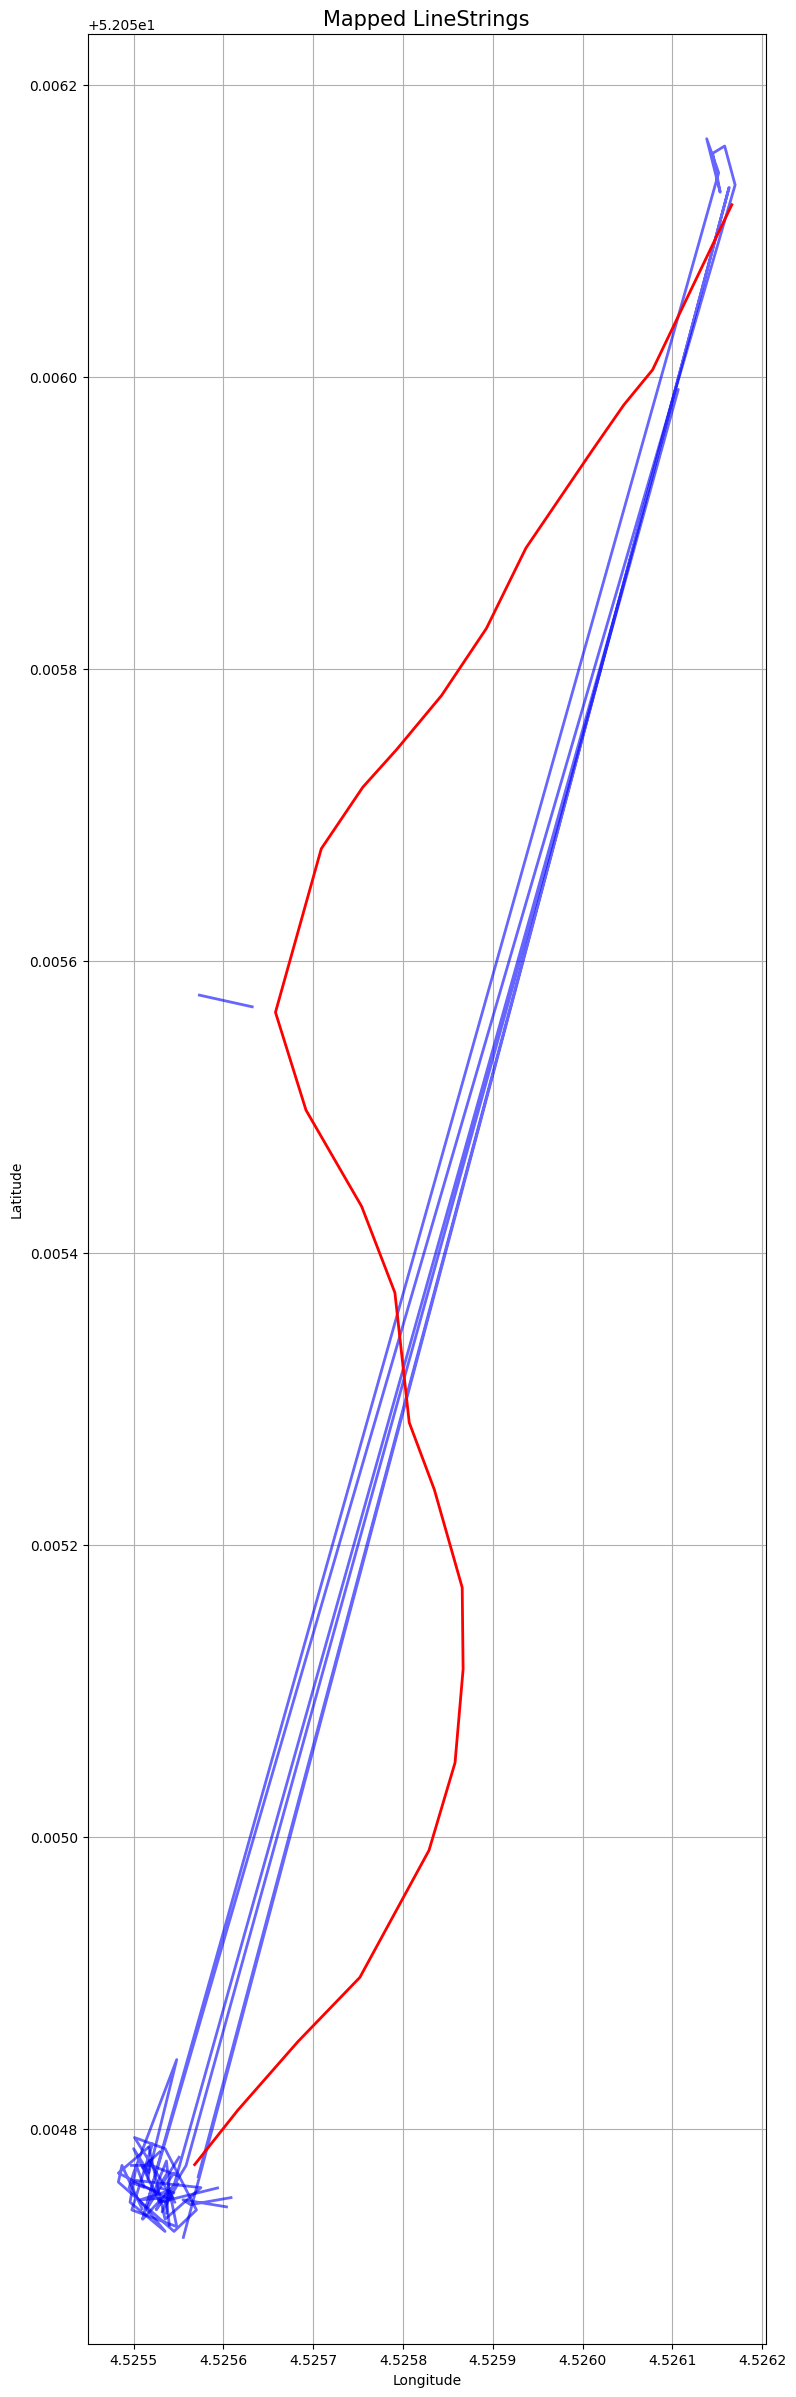

In [14]:

geojson_data = "trajectories_by_session.geojson"
gdf = gpd.read_file(geojson_data)

with open("line_string.geojson") as f:
    closedjson_data = json.load(f)

coordinates = [feature['geometry']['coordinates'] for feature in closedjson_data['features']]
line_string = LineString(coordinates)

line_gdf = gpd.GeoDataFrame(geometry=[line_string], crs="EPSG:4326")

fig, ax = plt.subplots(figsize=(30, 30))
gdf.plot(ax=ax, color='blue', linewidth=2, alpha=0.6)
line_gdf.plot(ax=ax, color='red', linewidth=2)

ax.set_title('Mapped LineStrings', fontsize=15)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.grid()
plt.show()